# CHESS DATA - Machine Learning

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

We will create and train a model. The model will try to predict whether or not White wins a game.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text
import graphviz 
import sys
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('notebook')   
# sns.set_context('paper')  # smaller
# sns.set_context('talk')   # larger

# change default plot size
rcParams['figure.figsize'] = 10,8

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/

If there are issues loading the PKL file, use these links and use the read_csv method instead, 
https://archive.org/download/chess_data_ML/chess_data_ML.csv
https://archive.org/download/chess_data_ML/openings_black.csv
https://archive.org/download/chess_data_ML/openings_white.csv

In [5]:
# conda install pandas = 1.4.2
print(pd.__version__)

1.4.2


In [2]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data_ML.pkl?raw=true', compression = 'zip')

In [3]:
openings_white = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/openings_white.pkl?raw=true', compression = 'zip')

In [4]:
openings_black = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/openings_black.pkl?raw=true', compression = 'zip')

In [6]:
# combine into one DF
chess_data = pd.concat([chess_data, openings_white], axis = 1)
chess_data = pd.concat([chess_data, openings_black], axis = 1)

In [10]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75,W1-Numeric,W2-Numeric,W3-Numeric,W4-Numeric,W5-Numeric,W6-Numeric,W7-Numeric,W8-Numeric,B1-Numeric,B2-Numeric,B3-Numeric,B4-Numeric,B5-Numeric,B6-Numeric,B7-Numeric,B8-Numeric
Game1,2000,1,2851,2555,147,d4,d5,c4,e6,Nc3,Nf6,cxd5,exd5,Bg5,c6,Qc2,Be7,e3,Nbd7,Bd3,O-O,Nge2,Re8,O-O,Nf8,f3,Ng6,Rad1,h6,Bxf6,Bxf6,Bxg6,fxg6,e4,g5,e5,Be7,f4,gxf4,Nxf4,Rf8,Ng6,Rxf1+,Rxf1,Be6,Ne2,Qd7,h4,Re8,Ng3,Bf7,Nxe7+,Rxe7,Nf5,Re6,Nd6,Bg6,Qc3,Rxd6,exd6,Qxd6,Qa3,Qb8,Qe7,Qg3,Rf3,Qg4,Qf8+,Kh7,Qf4,Qd7,Rg3,Be4,Qe5,Qf7,h5,Qd7,b4,a6,a4,Kg8,a5,Kh7,Kf2,Kg8,Qb8+,Kh7,Qf8,Bc2,Qf4,Be4,Qe5,Kg8,Ke3,Kh7,Ke2,Kg8,Qb8+,Kh7,Qf8,Bc2,Kd2,Be4,Kc1,Qc7,Rg4,Qd7,Rf4,Bxg2,Qf5+,Qxf5,Rxf5,Kg8,d2,h3,f4,e6,e3,f7,f5,f8,e5,e8,f4,f7,g4,e8,g3,f7,f4,e8,f5,xh5,e6,g6,e3,c2,f3+,g8,5,xb5,xd5,4,c4,3,c3,5,5,4,f4,5,6,<NA>,<NA>,<NA>,16,35,36,157,30,225,440,28,16,64,55,214,280,30,159,327
Game2,2000,1,2851,2544,45,e4,c5,Nf3,Nc6,Bb5,d6,c3,Nf6,Qe2,e5,d4,exd4,cxd4,a6,e5,Nd5,exd6+,Be6,Bxc6+,bxc6,dxc5,Qa5+,Bd2,Qxc5,O-O,Kd7,Na3,Bxd6,Rab1,Bf5,Rbc1,Rhe8,Qd1,Qa7,Nc4,Bc7,Bc3,f6,Nd4,Be6,Nxc6,Kxc6,Bd4,Qb8,Qa4+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,18,18,8,151,168,350,422,557,14,23,122,91,306,406,427,205
Game3,2000,1,2851,2748,90,d4,d5,c4,c6,Nc3,Nf6,Nf3,dxc4,a4,Bf5,Ne5,Nbd7,Nxc4,Qc7,g3,e5,dxe5,Nxe5,Bf4,Nfd7,Bg2,g5,Ne3,gxf4,Nxf5,O-O-O,Qc2,Ng4,a5,fxg3,hxg3,a6,Ra4,Ndf6,Ne4,Nxe4,Bxe4,h5,Kf1,Kb8,Kg2,Be7,Nxe7,Qxe7,Bf3,Ne5,Bxh5,Qe6,Qc3,f6,Rah4,Qf5,Bf3,Rxh4,Rxh4,Qb1,Rh1,Rd1,Rxd1,Qxd1,b4,Kc7,Qc5,Qd6,Qxd6+,Kxd6,Be4,Nc4,Bd3,Nb2,f4,Nd1,g4,Ne3+,Kf3,Nd5,Ke4,Nxb4,Bc4,c5,g5,fxg5,fxg5,Ke7,Kf5,Nc2,Ke5,Ne3,Be6,c4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,16,35,36,72,215,145,226,585,16,54,55,200,25,132,304,562
Game4,2000,1,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,18,18,57,72,241,18,264,526,18,30,122,112,293,30,168,169
Game5,2000,1,2851,2751,69,e4,e6,d4,d5,Nc3,Nf6,Bg5,dxe4,Nxe4,Nbd7,Nf3,Be7,Nxf6+,Bxf6,h4,O-O,Bd3,c5,Qe2,cxd4,Qe4,g6,O-O-O,Qa5,Bxf6,Nxf6,Qxd4,Nh5,a3,Rd8,Qe3,Bd7,g4,Nf6,Qf4,Nd5,Qh6,Nf6,Ng5,Bc6,Bxg6,hxg6,Nxe6,fxe6,Qxg6+,Kh8,

In [11]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156238 entries, Game1 to Game156371
Columns: 171 entries, Date to B8-Numeric
dtypes: int16(11), int32(4), int64(1), int8(5), string(150)
memory usage: 187.6+ MB


#### Classification is the correct type of machine learning for our prediction because we want to predict a win or loss. The team ran both kNN and tree classification algorithms and compared the results. kNN classification gives the best results and better prediction.

### kNN CLASSIFICATION

In [22]:
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = (chess_data[target] == 1).values

In [23]:
chess_data[predictors].describe()

,W1-Numeric,W2-Numeric,W3-Numeric,W4-Numeric,W5-Numeric,W6-Numeric,W7-Numeric,W8-Numeric,W-ELO,B-ELO,Num Moves
count,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000,156238.000000
mean,15.977745,28.593454,59.818514,101.328774,144.645957,188.816805,245.555697,324.279516,2216.116598,2207.695522,79.465309
std,3.423533,11.595025,31.798010,57.933231,86.965449,136.279370,155.793048,194.732021,294.123285,293.924413,25.311717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,503.000000,16.000000
25%,16.000000,18.000000,36.000000,59.000000,91.000000,30.000000,90.000000,179.000000,2105.000000,2099.000000,61.000000
50%,18.000000,35.000000,45.000000,89.000000,135.000000,172.000000,264.000000,329.000000,2270.000000,2265.000000,77.000000
75%,18.000000,39.000000,86.000000,159.000000,238.000000,338.000000,413.000000,525.000000,2415.000000,2405.000000,95.000000
max,24.000000,54.000000,114.000000,197.000000,291.000000,402.000000,486.000000,608.000000,2851.000000,2851.000000,150.000000


In [24]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [25]:
print(X_train[:10,:])

[[  14   18   36  185   28  213  427  417 2560 2395   63]
 [  18   18   86   89   91   23  455  356 2515 2360   75]
 [  18   46   36  159  110  145   36  316 2552 2474   85]
 [  18   18    9   98  231  303    7   19 2475 2545   61]
 [  18   18   78  159  246  348   25  329 2410 2310   51]
 [  16   35   36  168  110  225  469   78 2659 2543   55]
 [  18   18    8   98  207   53  427  297 2400 2475   41]
 [  16   18   94   15   88  213  402   12 1826 1437   71]
 [  18   18   86   89   86  339  402  149 2225 2295   61]
 [  16   18   17  168   15  117   25   51 2037 1873  109]]


In [26]:
# build a kNN classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# make predictions
predictions = clf.predict(X_test)

In [28]:
# compare first ten predictions with first ten correct values
print(predictions[:10])
print(y_test[:10])

[ True  True  True False  True  True False  True False  True]
[ True  True  True False  True  True  True  True  True  True]


In [29]:
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.687


In [21]:
# try with k = 7 instead of the default value of 5
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.698


We can try to make the model a little better by including Black's opening as well.

In [30]:
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'B1-Numeric', 'B2-Numeric', 'B3-Numeric', 'B4-Numeric', 'B5-Numeric', 'B6-Numeric', 'B7-Numeric', 'B8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = (chess_data[target] == 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [31]:
# try with both players' openings
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.672


Adding Black's opening moves did not improve our prediction accuracy.

### DECISION TREE CLASSIFIER

In [32]:
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target_names = ['Game Result']
X = chess_data[predictors].values
y = (chess_data[target] == 1).values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#
# train the model
#

# features are permuted randomly at each split, so the best
# fit found may vary if several splits are equally good
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.8333333333333334, 'X[8] <= 2365.5\ngini = 0.492\nsamples = 109366\nvalue = [47705, 61661]'),
 Text(0.25, 0.5, 'X[9] <= 2306.5\ngini = 0.5\nsamples = 72741\nvalue = [37190, 35551]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.489\nsamples = 52620\nvalue = [22410, 30210]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.39\nsamples = 20121\nvalue = [14780, 5341]'),
 Text(0.75, 0.5, 'X[9] <= 2428.5\ngini = 0.409\nsamples = 36625\nvalue = [10515, 26110]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.279\nsamples = 21401\nvalue = [3594, 17807]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.496\nsamples = 15224\nvalue = [6921, 8303]')]

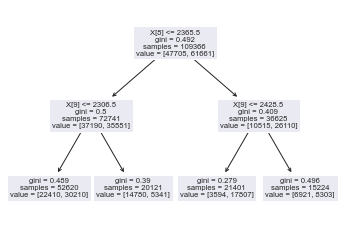

In [34]:
tree.plot_tree(clf)

In [35]:
#
# show the fitted tree using text
#

r = export_text(clf, feature_names=predictors)
print(r)

|--- W-ELO <= 2365.50
|   |--- B-ELO <= 2306.50
|   |   |--- class: True
|   |--- B-ELO >  2306.50
|   |   |--- class: False
|--- W-ELO >  2365.50
|   |--- B-ELO <= 2428.50
|   |   |--- class: True
|   |--- B-ELO >  2428.50
|   |   |--- class: True



In [36]:
#
# other information about the fit
#

clf.get_depth()
clf.get_n_leaves()

# "the normalized total reduction of the criterion brought
# by that feature".  aka Gini importance.
# clf.feature_importances_

# clf

4

(array([ 8544.,     0.,     0.,     0.,  6406., 22840.,     0.,     0.,
            0.,  9082.]),
 array([0.26544406, 0.32210605, 0.37876804, 0.43543002, 0.49209201,
        0.54875399, 0.60541598, 0.66207796, 0.71873995, 0.77540194,
        0.83206392]),
 <BarContainer object of 10 artists>)

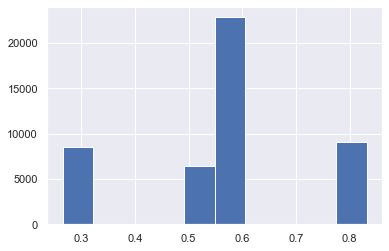

In [37]:
#
# make predictions
#

y_predict = clf.predict(X_test)

# accuracy
(y_predict == y_test).mean()

# predict probabilities -- many will be the same
y_predict_probs = clf.predict_proba(X_test)[:,1]
plt.hist(y_predict_probs)

In [38]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(y_test, y_predict)

array([[ 6220, 14157],
       [ 2324, 24171]], dtype=int64)

C:\Users\Abrah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


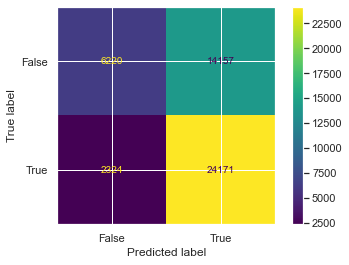

In [39]:
#a prettier approach
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  

In [40]:
accuracy = (y_predict == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.648
